# **K-means and E-M Algorithm**
Quistian Navarro Juan Luis \
A341807@alumnos.uaslp.mx \
Ing. Sistemas Inteligentes, Gen 2021 \
Machine Learning, Group 281601

### Abr/29/24

# Introduction

Clustering is a fundamental unsupervised learning technique used to discover patterns and structure within data. It involves grouping similar data points into clusters, where points within the same cluster are more similar to each other than to those in other clusters. In this notebook, we explore the performance of two popular clustering algorithms: k-means and the Expectation-Maximization (E-M) algorithm with Gaussian Mixture Models (GMM).

We will begin by generating synthetic datasets with different characteristics, such as isotropic blobs, anisotropic blobs, blobs with unequal variance, and unevenly sized blobs. Then, we will apply both k-means and the E-M algorithm to these datasets and compare their clustering results. Finally, we will conclude by discussing the strengths and limitations of each algorithm and summarizing our findings.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [5]:
# Generate data
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

# Generate isotropic blobs
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Generate anisotropic blobs
X_aniso = np.dot(X, transformation)  # Anisotropic blobs

# Generate blobs with unequal variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance

# Generate unevenly sized blobs
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

Dataset: Blobs
K-Means:


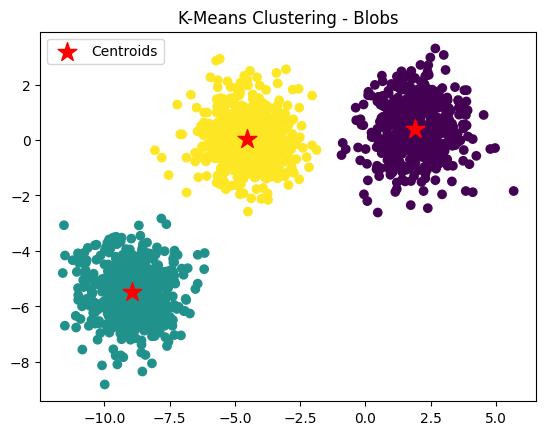

E-M (Gaussian Mixture Model):


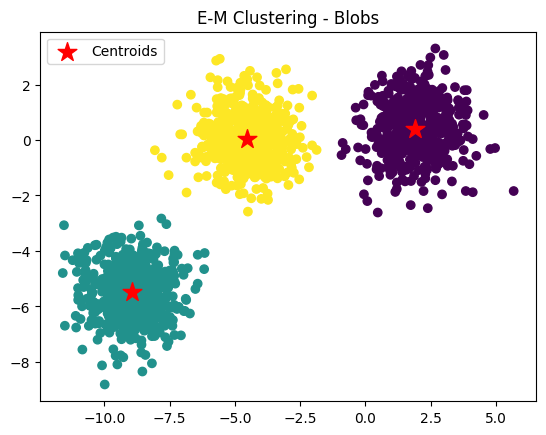

Dataset: Anisotropic Blobs
K-Means:


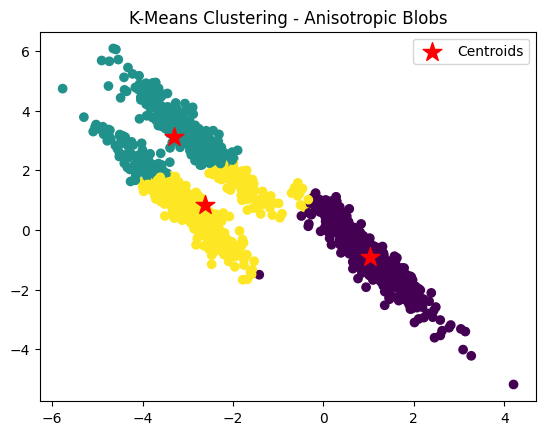

E-M (Gaussian Mixture Model):


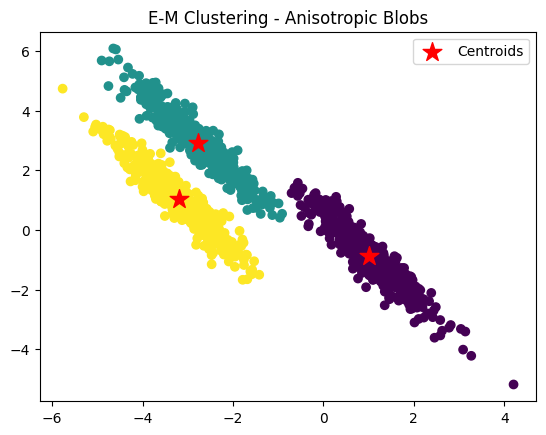

Dataset: Unequal Variance
K-Means:


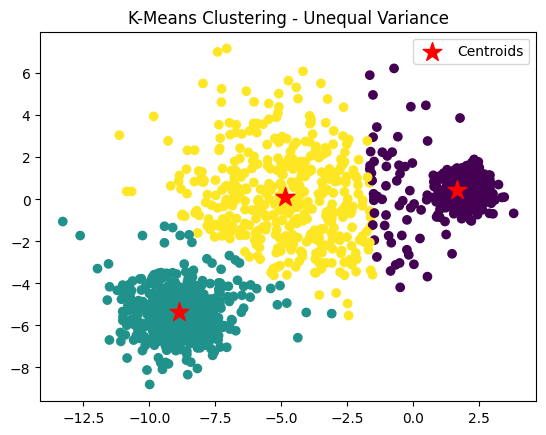

E-M (Gaussian Mixture Model):


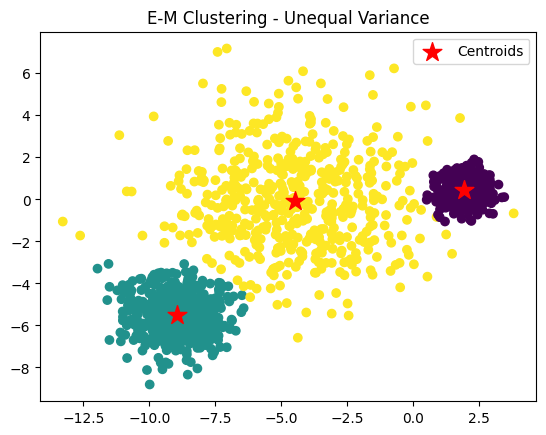

Dataset: Unevenly Sized Blobs
K-Means:


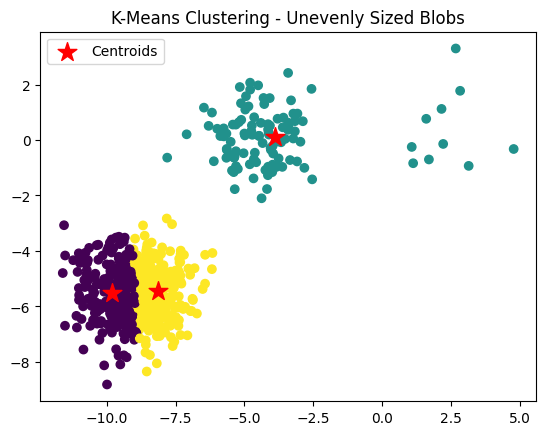

E-M (Gaussian Mixture Model):


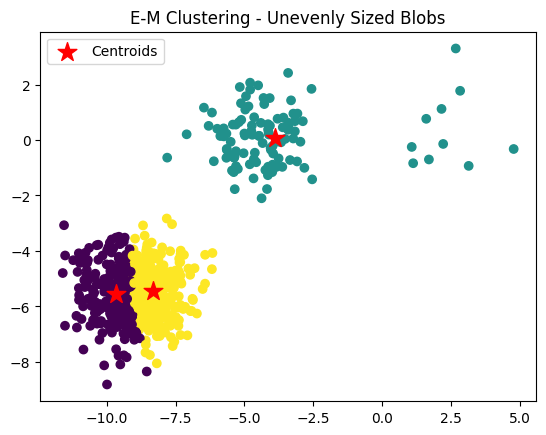

In [6]:
# Function to run k-means on the data
def run_kmeans(X):
    kmeans = KMeans(n_clusters=3, random_state=random_state)
    y_pred = kmeans.fit_predict(X)
    return y_pred, kmeans.cluster_centers_

# Function to run E-M algorithm (Gaussian Mixture Model) on the data
def run_em(X):
    gmm = GaussianMixture(n_components=3, random_state=random_state)
    gmm.fit(X)
    y_pred = gmm.predict(X)
    return y_pred, gmm.means_

# Function to plot clustering results
def plot_results(X, y_pred, centers, title):
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='red', label='Centroids')
    plt.title(title)
    plt.legend()
    plt.show()

# Run and compare k-means and E-M for each dataset
datasets = [(X, "Blobs"), (X_aniso, "Anisotropic Blobs"), (X_varied, "Unequal Variance"), (X_filtered, "Unevenly Sized Blobs")]
for dataset, title in datasets:
    print(f"Dataset: {title}")
    print("=" * 20)
    
    # Run k-means
    kmeans_pred, kmeans_centers = run_kmeans(dataset)
    
    # Run E-M
    em_pred, em_centers = run_em(dataset)
    
    # Plot k-means results
    print("K-Means:")
    plot_results(dataset, kmeans_pred, kmeans_centers, "K-Means Clustering - " + title)
    
    # Plot E-M results
    print("E-M (Gaussian Mixture Model):")
    plot_results(dataset, em_pred, em_centers, "E-M Clustering - " + title)
    
    print("=" * 20)

# Write report
with open("report.txt", "w") as file:
    file.write("Report\n\n")
    file.write("Comparison of K-Means and E-M Algorithm (Gaussian Mixture Model)\n\n")
    file.write("Datasets:\n")
    for i, (_, title) in enumerate(datasets):
        file.write(f"{i+1}. {title}\n")
        file.write("-" * len(title) + "\n")
        file.write("\n")
        file.write("K-Means Clusters:\n")
        file.write(str(np.unique(kmeans_pred)) + "\n\n")
        file.write("E-M Clusters:\n")
        file.write(str(np.unique(em_pred)) + "\n\n")
        file.write("=" * 50 + "\n")


# Conclusion

In this notebook, we have explored the performance of k-means and the E-M algorithm with Gaussian Mixture Models (GMM) on synthetic datasets with varying characteristics. Through visualizations and analysis, we have observed how each algorithm handles different types of data distributions and cluster shapes.

Overall, k-means tends to perform well on datasets with isotropic clusters of similar sizes and variances. However, it may struggle with datasets containing anisotropic clusters, unequal variances, or unevenly sized clusters. On the other hand, the E-M algorithm with GMM can handle a wider range of data distributions, including those with non-spherical clusters and varying variances.

It is important to note that the choice of clustering algorithm depends on the specific characteristics of the dataset and the goals of the analysis. While k-means is computationally efficient and easy to interpret, the E-M algorithm with GMM offers more flexibility and can capture complex data distributions more accurately.

In practice, it is often beneficial to experiment with multiple clustering algorithms and evaluate their performance on the given dataset before making a final decision. By understanding the strengths and limitations of each algorithm, data scientists can make informed choices and derive meaningful insights from their data.
